In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from joblib import load
X_train, X_test, Y_train, Y_test = load("../../preprocessing/classification_data.joblib")
X_train.head()

,the numeric,and numeric,a numeric,of numeric,to numeric,is numeric,I numeric,in numeric,that numeric,it numeric,...,ompa numeric,ra_ numeric,le_to numeric,bra numeric,uch_a numeric,ave_a numeric,n_in_ numeric,ied_ numeric,nd_b numeric,rso numeric
0,0.46875,0.238095,0.45,0.32,0.250000,0.466667,0.095238,0.333333,0.500000,0.222222,...,0.0,0.000000,0.0,0.0,0.0,0.333333,0.0,0.0,0.000000,0.00
1,0.40625,0.666667,0.60,0.20,0.208333,0.466667,0.428571,0.133333,0.166667,0.111111,...,0.0,0.166667,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.00
2,0.71875,0.476190,0.35,0.36,0.333333,0.066667,0.333333,0.200000,0.083333,0.166667,...,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.00
3,0.09375,0.190476,0.10,0.08,0.083333,0.000000,0.238095,0.066667,0.083333,0.111111,...,0.0,0.166667,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.00
4,0.62500,0.428571,0.35,0.64,0.208333,0.200000,0.000000,0.666667,0.166667,0.000000,...,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.333333,0.25


In [2]:
from sklearn.neighbors import KNeighborsClassifier
%run ../../functions/Model.ipynb

In [3]:
knn = KNeighborsClassifier()
knn = build_model(knn, X_train, X_test, Y_train, Y_test)

Train data:
Confusion matrix: 
 [[ 5  0  0 ...  0  0  0]
 [ 0  9  0 ...  0  0  0]
 [ 0  0 18 ...  0  0  0]
 ...
 [ 0  1  0 ...  6  0  0]
 [ 0  0  4 ...  0  2  0]
 [ 0  0  0 ...  1  0  1]]
Accuracy score: 
 0.24916666666666668
Precision score: 
 [0.83, 0.35, 0.29, 1.0, 0.1, 0.31, 1.0, 1.0, 0.31, 0.04, 1.0, 0.29, 1.0, 1.0, 0.4, 1.0, 1.0, 1.0, 1.0, 1.0, 0.23, 0.84, 0.75, 0.33, 1.0, 1.0, 0.31, 0.33, 1.0, 1.0, 1.0, 1.0, 0.32, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.3, 1.0, 1.0]
Recall score: 
 [0.21, 0.38, 0.75, 0.58, 0.42, 0.67, 0.38, 0.42, 0.46, 0.96, 0.08, 0.25, 0.17, 0.17, 0.17, 0.12, 0.17, 0.33, 0.58, 0.12, 0.29, 0.67, 0.12, 0.08, 0.54, 0.08, 0.17, 0.54, 0.0, 0.0, 0.25, 0.17, 0.29, 0.25, 0.21, 0.12, 0.25, 0.0, 0.08, 0.04, 0.0, 0.04, 0.08, 0.04, 0.33, 0.0, 0.04, 0.25, 0.08, 0.04]
F1 score: 
 [0.33, 0.36, 0.42, 0.74, 0.16, 0.43, 0.55, 0.59, 0.37, 0.07, 0.15, 0.27, 0.29, 0.29, 0.24, 0.22, 0.29, 0.5, 0.74, 0.22, 0.25, 0.74, 0.21, 0.13, 0.7, 0.15, 0.22, 0.41,

In [4]:
import math
param_grid = {'n_neighbors': range(5, math.ceil(math.sqrt(X_train.shape[0])), 5),
             'weights': ['uniform', 'distance'],
             'p': [1, 2]}
search = GridSearchCV(KNeighborsClassifier(), param_grid, scoring='accuracy', cv=3)

In [5]:
search.fit(X_train, Y_train)

GridSearchCV(cv=3, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': range(5, 35, 5), 'p': [1, 2],
                         'weights': ['uniform', 'distance']},
             scoring='accuracy')

In [6]:
search.best_params_

{'n_neighbors': 5, 'p': 2, 'weights': 'distance'}

In [7]:
search.best_score_

0.12666666666666668

In [8]:
search = build_model(search, X_train, X_test, Y_train, Y_test)

Train data:
Confusion matrix: 
 [[24  0  0 ...  0  0  0]
 [ 0 24  0 ...  0  0  0]
 [ 0  0 24 ...  0  0  0]
 ...
 [ 0  0  0 ... 24  0  0]
 [ 0  0  0 ...  0 24  0]
 [ 0  0  0 ...  0  0 24]]
Accuracy score: 
 1.0
Precision score: 
 [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]
Recall score: 
 [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]
F1 score: 
 [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 

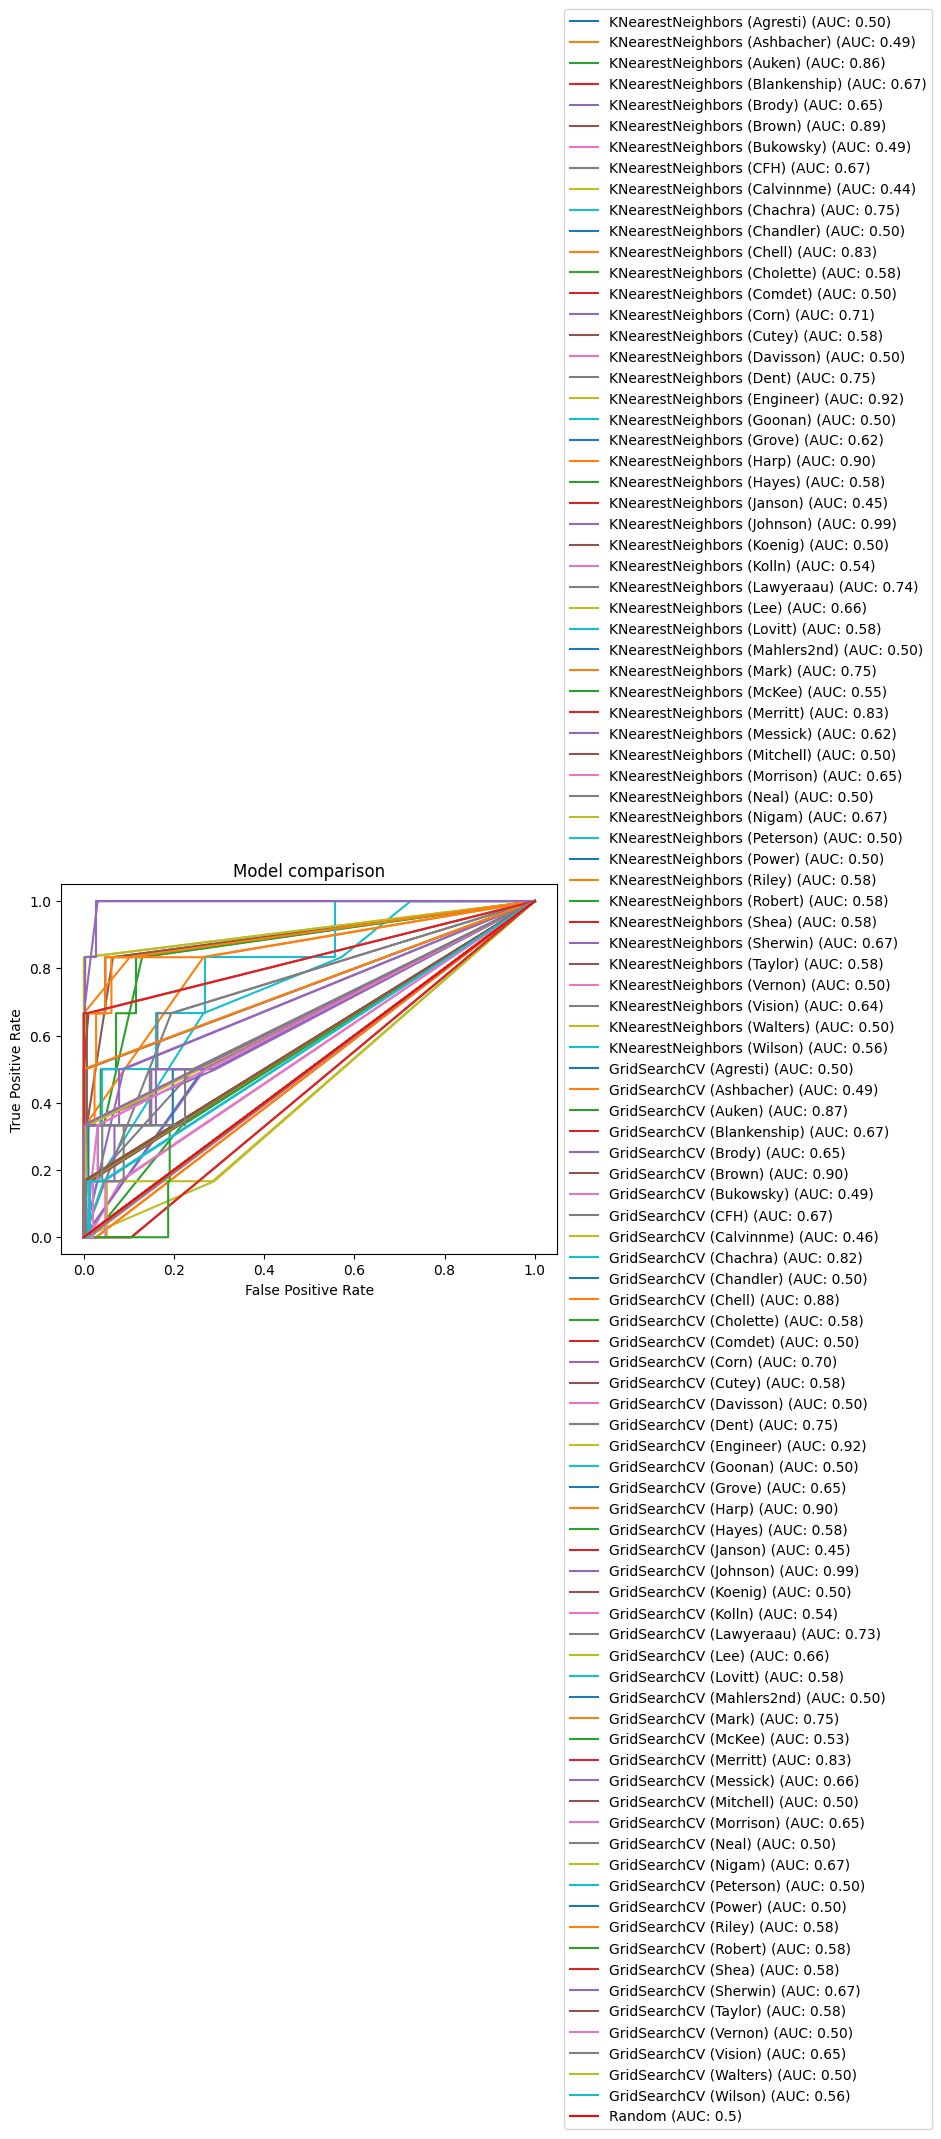

In [9]:
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize
import matplotlib.pyplot as plt
import mplcursors

models = [knn, search.best_estimator_]
model_names = ['KNearestNeighbors', 'GridSearchCV']

y_test_bin = label_binarize(Y_test, classes=np.unique(Y_test))
class_names = np.unique(Y_test)

for model, model_name in zip(models, model_names):
    y_pred_prob = model.predict_proba(X_test)
    n_classes = y_pred_prob.shape[1]

    for i in range(n_classes):
        fpr, tpr, _ = roc_curve(y_test_bin[:, i], y_pred_prob[:, i])
        roc_auc = auc(fpr, tpr)
        lab = f"{model_name} ({class_names[i]}) (AUC: {roc_auc:.2f})"
        plt.plot(fpr, tpr, label=lab)

plt.plot([0, 1], [0, 1], label='Random (AUC: 0.5)', color='red')

plt.title("Model comparison")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
legend = plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
mplcursors.cursor(legend)
plt.show()

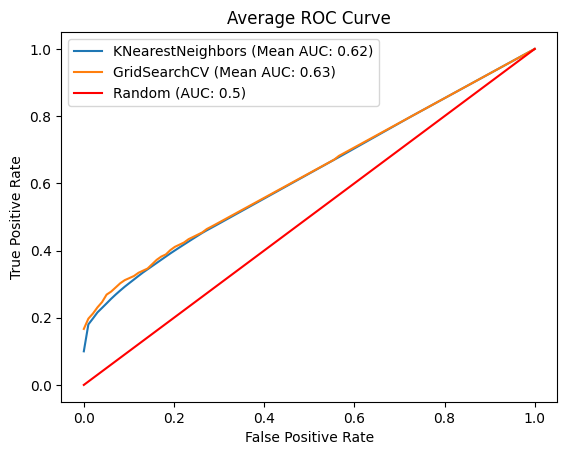

In [10]:
plt.figure()

for model, model_name in zip(models, model_names):
    y_pred_prob = model.predict_proba(X_test)
    n_classes = y_pred_prob.shape[1]

    mean_fpr = np.linspace(0, 1, 100)
    mean_tpr = 0.0

    for i in range(n_classes):
        fpr, tpr, _ = roc_curve(y_test_bin[:, i], y_pred_prob[:, i])
        mean_tpr += np.interp(mean_fpr, fpr, tpr)

    mean_tpr /= n_classes
    mean_auc = auc(mean_fpr, mean_tpr)

    plt.plot(mean_fpr, mean_tpr, label=f"{model_name} (Mean AUC: {mean_auc:.2f})")

plt.plot([0, 1], [0, 1], label='Random (AUC: 0.5)', color='red')

plt.title("Average ROC Curve")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend()

plt.show()

In [11]:
from joblib import dump
dump(models, 'knn.joblib')

['knn.joblib']